<a href="https://colab.research.google.com/github/Abdullahsaber86/Python-Qauntum-Chemistry/blob/main/Input_structure_for_Cellulose%20Acetate_calculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup
Please run cell below to install the required pacakages

In [1]:
! pip install rdkit
! pip install pyscf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 7.9 MB/s eta 0:00:00


# Creating structures from SMILES

Molecules can be represented as strings with SMILES. Simplified molecular-input line-entry system (SMILES) is a string based representation of a molecule. (https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) For example n-butane is represented as CCCC. Interactive RDKit demo for SMILES is available at https://rdkit.org/temp/demo/demo.html

If you want to draw a 2D structure of molecule and obtain the SMILES representation, use this link https://pubchem.ncbi.nlm.nih.gov//edit3/index.html

In [2]:
# import these definitions
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

Let us see how to visualize the 2D structure of toluene using SMILES

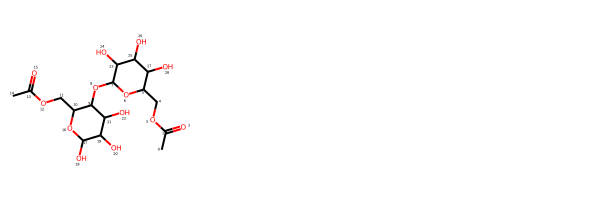

In [3]:
# set SMILES for Cellulose Acetate 2 unit
smiles = "CC(=O)OCC2OC(OC1C(COC(C)=O)OC(O)C(O)C1O)C(O)C(O)C2O"

# Convert to RDKit molecule
mol = Chem.MolFromSmiles(smiles)

# Draw the strucutre
Draw.MolsToGridImage([mol])

The structure generated has implicit hydrogen atoms. We will need explicit hydrogen atoms to generate the input structure

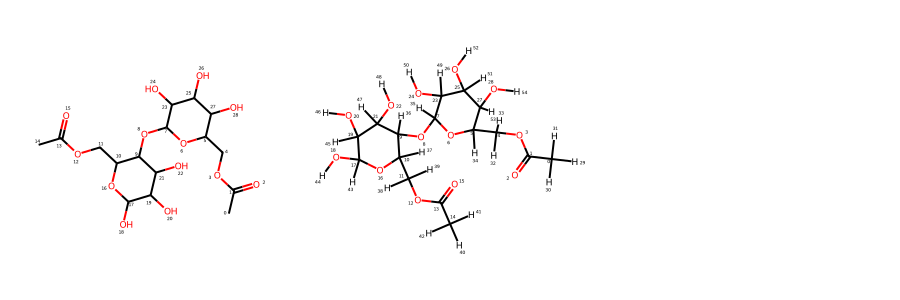

In [4]:
# Add hydrogens
mol_h = Chem.AddHs(mol)

# Display both structures
Draw.MolsToGridImage([mol, mol_h], subImgSize=(300,300))

The input to a quantum chemistry calculation is a 3D structure. Adding x,y,z coordinates to each atom generates a conformer. The section below generates one confomer.

In [5]:
# The current molecule has z = 0 for all atoms
# This is a 2D molecule
print(Chem.MolToMolBlock(mol_h))


     RDKit          2D

 55 56  0  0  0  0  0  0  0  0999 V2000
    6.3567    2.3795    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2077    1.4153    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.4681   -0.0619    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.7981    1.9284    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.6491    0.9642    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4895   -2.7762    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6386   -3.7404    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4895   -4.7046    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9200   -5.2176    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3296   -5.7307    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.4786   -4.7665    0

In [6]:
# Let us make it 3D by generating a random conformer
Chem.AllChem.EmbedMolecule(mol_h)

# look at the molecule again
print(Chem.MolToMolBlock(mol_h))


     RDKit          3D

 55 56  0  0  0  0  0  0  0  0999 V2000
    7.3844   -0.1928    0.5824 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.9680   -0.5314    0.8039 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.4351   -0.2900    1.8983 O   0  0  0  0  0  0  0  0  0  0  0  0
    5.2201   -1.1185   -0.1980 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.8676   -1.4772   -0.0834 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.9682   -0.2899    0.2216 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6763   -0.6585    0.3265 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7046    0.1369   -0.1997 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4167    0.0059    0.6568 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4737   -0.6383    0.0690 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.7809    0.1314    0.1182 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6509    1.4625   -0.5751 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7928    2.2554   -0.5814 O   0  0  0  0  0  0  0  0  0  0  0  0
   -5.0105    2.0220   -1

In [7]:
# Save the molecule in XYZ format for future use
Chem.MolToXYZFile(mol_h,"Cellulose Acetate.xyz")

Conformer generation is an active area of research.

1.   https://www.rdkit.org/UGM/2012/Ebejer_20110926_RDKit_1stUGM.pdf
2.   https://pubs.acs.org/doi/10.1021/acs.jcim.0c00025

# Running DFT calculation

We will use PySCF which is open-source software for running quantum chemistry calculations. You can find more details here - https://pyscf.org/

More tutorials and example files for PySCF are available at https://github.com/pyscf/pyscf/tree/master/examples

In [8]:
# import the package
from pyscf import gto, scf

We need a 3D structure input to PSI4. Then we set other parameters - DFT functional, basis set, charge. Details about the parametrs will be discussed in the next session.

In [9]:
# @title Default title text
# reading the xyz into PSI4 - first open the file the pass it to PSI4
mol = gto.M(atom="Cellulose Acetate.xyz")

In [10]:
# set basis set
mol.basis = "6-31G"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

In [11]:
# run calculation to get total energy
mf.kernel()

/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:1102: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -1581.77482322167


-1581.7748232216654